# **Natural Language Processing in TensorFlow 01/04/2020 **

Data Scientists **Jose R F Junior** - web2ajax@gmail.com

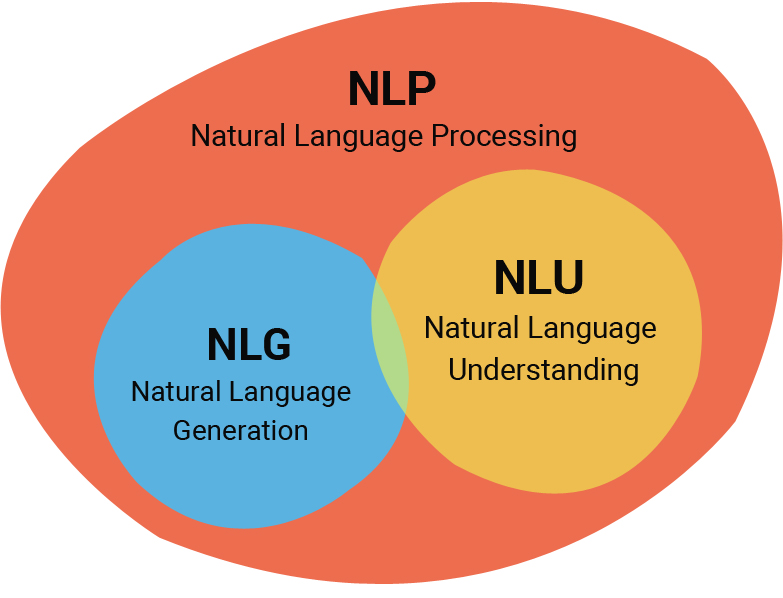

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'Herick e uma puta safada',
    'Bolsonaro come o cu de Lula',
    'Satanas e negro de penis grande',
    'Bolsonaro e safado',
    'Lula e ladrao',
    'Herick nao transa',
    'Herick tem penis pequeno',
    'Fred e viadinho nordestino'
]

tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

02

In [ ]:
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

padded = pad_sequences(sequences, maxlen=5)
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)
print("\nPadded Sequences:")
print(padded)


# Try with words that the tokenizer wasn't fit to
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")
print(padded)

03

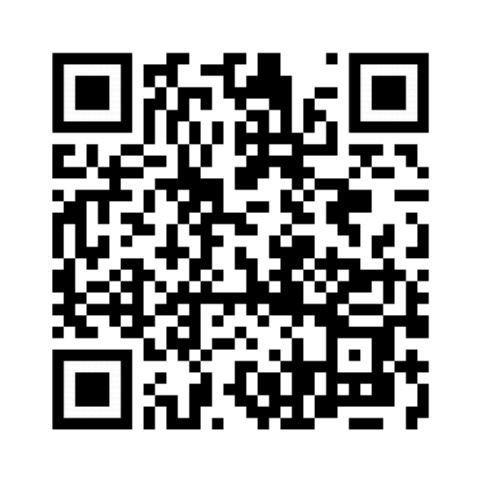

04

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json
  
import json

with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = [] 
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])



from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
print(len(word_index))
print(word_index)
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

05

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

  
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



#Stopwords list from https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]


In [ ]:
sentences = []
labels = []
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
            sentence = sentence.replace("  ", " ")
        sentences.append(sentence)


print(len(sentences))
print(sentences[0])

#Expected output
# 2225
# tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well brand identity viewer loyalty channels. although us leads technology moment also concern raised europe particularly growing uptake services like sky+. happens today will see nine months years time uk adam hume bbc broadcast s futurologist told bbc news website. likes bbc no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters brand loyalty important everyone. will talking content brands rather network brands said tim hanlon brand communications firm starcom mediavest. reality broadband connections anybody can producer content. added: challenge now hard promote programme much choice. means said stacey jolna senior vice president tv guide tv group way people find content want watch simplified tv viewers. means networks us terms channels take leaf google s book search engine future instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands mr hanlon suggested. end kids just diapers pushing buttons already - everything possible available said mr hanlon. ultimately consumer will tell market want. 50 000 new gadgets technologies showcased ces many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies directtv even launched branded dvr show 100-hours recording capability instant replay search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo called tivotogo means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want want.

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))
# Expected output
# 29714

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

# Expected output
# [  96  176 1158 ...    0    0    0]
# (2225, 2442)

In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
label_word_index = label_tokenizer.word_index
label_seq = label_tokenizer.texts_to_sequences(labels)
print(label_seq)
print(label_word_index)
# Expected Output
# [[4], [2], [1], [1], [5], [3], [3], [1], [1], [5], [5], [2], [2], [3], [1], [2], [3], [1], [2], [4], [4], [4], [1], [1], [4], [1], [5], [4], [3], [5], [3], [4], [5], [5], [2], [3], [4], [5], [3], [2], [3], [1], [2], [1], [4], [5], [3], [3], [3], [2], [1], [3], [2], [2], [1], [3], [2], [1], [1], [2], [2], [1], [2], [1], [2], [4], [2], [5], [4], [2], [3], [2], [3], [1], [2], [4], [2], [1], [1], [2], [2], [1], [3], [2], [5], [3], [3], [2], [5], [2], [1], [1], [3], [1], [3], [1], [2], [1], [2], [5], [5], [1], [2], [3], [3], [4], [1], [5], [1], [4], [2], [5], [1], [5], [1], [5], [5], [3], [1], [1], [5], [3], [2], [4], [2], [2], [4], [1], [3], [1], [4], [5], [1], [2], [2], [4], [5], [4], [1], [2], [2], [2], [4], [1], [4], [2], [1], [5], [1], [4], [1], [4], [3], [2], [4], [5], [1], [2], [3], [2], [5], [3], [3], [5], [3], [2], [5], [3], [3], [5], [3], [1], [2], [3], [3], [2], [5], [1], [2], [2], [1], [4], [1], [4], [4], [1], [2], [1], [3], [5], [3], [2], [3], [2], [4], [3], [5], [3], [4], [2], [1], [2], [1], [4], [5], [2], [3], [3], [5], [1], [5], [3], [1], [5], [1], [1], [5], [1], [3], [3], [5], [4], [1], [3], [2], [5], [4], [1], [4], [1], [5], [3], [1], [5], [4], [2], [4], [2], [2], [4], [2], [1], [2], [1], [2], [1], [5], [2], [2], [5], [1], [1], [3], [4], [3], [3], [3], [4], [1], [4], [3], [2], [4], [5], [4], [1], [1], [2], [2], [3], [2], [4], [1], [5], [1], [3], [4], [5], [2], [1], [5], [1], [4], [3], [4], [2], [2], [3], [3], [1], [2], [4], [5], [3], [4], [2], [5], [1], [5], [1], [5], [3], [2], [1], [2], [1], [1], [5], [1], [3], [3], [2], [5], [4], [2], [1], [2], [5], [2], [2], [2], [3], [2], [3], [5], [5], [2], [1], [2], [3], [2], [4], [5], [2], [1], [1], [5], [2], [2], [3], [4], [5], [4], [3], [2], [1], [3], [2], [5], [4], [5], [4], [3], [1], [5], [2], [3], [2], [2], [3], [1], [4], [2], [2], [5], [5], [4], [1], [2], [5], [4], [4], [5], [5], [5], [3], [1], [3], [4], [2], [5], [3], [2], [5], [3], [3], [1], [1], [2], [3], [5], [2], [1], [2], [2], [1], [2], [3], [3], [3], [1], [4], [4], [2], [4], [1], [5], [2], [3], [2], [5], [2], [3], [5], [3], [2], [4], [2], [1], [1], [2], [1], [1], [5], [1], [1], [1], [4], [2], [2], [2], [3], [1], [1], [2], [4], [2], [3], [1], [3], [4], [2], [1], [5], [2], [3], [4], [2], [1], [2], [3], [2], [2], [1], [5], [4], [3], [4], [2], [1], [2], [5], [4], [4], [2], [1], [1], [5], [3], [3], [3], [1], [3], [4], [4], [5], [3], [4], [5], [2], [1], [1], [4], [2], [1], [1], [3], [1], [1], [2], [1], [5], [4], [3], [1], [3], [4], [2], [2], [2], [4], [2], [2], [1], [1], [1], [1], [2], [4], [5], [1], [1], [4], [2], [4], [5], [3], [1], [2], [3], [2], [4], [4], [3], [4], [2], [1], [2], [5], [1], [3], [5], [1], [1], [3], [4], [5], [4], [1], [3], [2], [5], [3], [2], [5], [1], [1], [4], [3], [5], [3], [5], [3], [4], [3], [5], [1], [2], [1], [5], [1], [5], [4], [2], [1], [3], [5], [3], [5], [5], [5], [3], [5], [4], [3], [4], [4], [1], [1], [4], [4], [1], [5], [5], [1], [4], [5], [1], [1], [4], [2], [3], [4], [2], [1], [5], [1], [5], [3], [4], [5], [5], [2], [5], [5], [1], [4], [4], [3], [1], [4], [1], [3], [3], [5], [4], [2], [4], [4], [4], [2], [3], [3], [1], [4], [2], [2], [5], [5], [1], [4], [2], [4], [5], [1], [4], [3], [4], [3], [2], [3], [3], [2], [1], [4], [1], [4], [3], [5], [4], [1], [5], [4], [1], [3], [5], [1], [4], [1], [1], [3], [5], [2], [3], [5], [2], [2], [4], [2], [5], [4], [1], [4], [3], [4], [3], [2], [3], [5], [1], [2], [2], [2], [5], [1], [2], [5], [5], [1], [5], [3], [3], [3], [1], [1], [1], [4], [3], [1], [3], [3], [4], [3], [1], [2], [5], [1], [2], [2], [4], [2], [5], [5], [5], [2], [5], [5], [3], [4], [2], [1], [4], [1], [1], [3], [2], [1], [4], [2], [1], [4], [1], [1], [5], [1], [2], [1], [2], [4], [3], [4], [2], [1], [1], [2], [2], [2], [2], [3], [1], [2], [4], [2], [1], [3], [2], [4], [2], [1], [2], [3], [5], [1], [2], [3], [2], [5], [2], [2], [2], [1], [3], [5], [1], [3], [1], [3], [3], [2], [2], [1], [4], [5], [1], [5], [2], [2], [2], [4], [1], [4], [3], [4], [4], [4], [1], [4], [4], [5], [5], [4], [1], [5], [4], [1], [1], [2], [5], [4], [2], [1], [2], [3], [2], [5], [4], [2], [3], [2], [4], [1], [2], [5], [2], [3], [1], [5], [3], [1], [2], [1], [3], [3], [1], [5], [5], [2], [2], [1], [4], [4], [1], [5], [4], [4], [2], [1], [5], [4], [1], [1], [2], [5], [2], [2], [2], [5], [1], [5], [4], [4], [4], [3], [4], [4], [5], [5], [1], [1], [3], [2], [5], [1], [3], [5], [4], [3], [4], [4], [2], [5], [3], [4], [3], [3], [1], [3], [3], [5], [4], [1], [3], [1], [5], [3], [2], [2], [3], [1], [1], [1], [5], [4], [4], [2], [5], [1], [3], [4], [3], [5], [4], [4], [2], [2], [1], [2], [2], [4], [3], [5], [2], [2], [2], [2], [2], [4], [1], [3], [4], [4], [2], [2], [5], [3], [5], [1], [4], [1], [5], [1], [4], [1], [2], [1], [3], [3], [5], [2], [1], [3], [3], [1], [5], [3], [2], [4], [1], [2], [2], [2], [5], [5], [4], [4], [2], [2], [5], [1], [2], [5], [4], [4], [2], [2], [1], [1], [1], [3], [3], [1], [3], [1], [2], [5], [1], [4], [5], [1], [1], [2], [2], [4], [4], [1], [5], [1], [5], [1], [5], [3], [5], [5], [4], [5], [2], [2], [3], [1], [3], [4], [2], [3], [1], [3], [1], [5], [1], [3], [1], [1], [4], [5], [1], [3], [1], [1], [2], [4], [5], [3], [4], [5], [3], [5], [3], [5], [5], [4], [5], [3], [5], [5], [4], [4], [1], [1], [5], [5], [4], [5], [3], [4], [5], [2], [4], [1], [2], [5], [5], [4], [5], [4], [2], [5], [1], [5], [2], [1], [2], [1], [3], [4], [5], [3], [2], [5], [5], [3], [2], [5], [1], [3], [1], [2], [2], [2], [2], [2], [5], [4], [1], [5], [5], [2], [1], [4], [4], [5], [1], [2], [3], [2], [3], [2], [2], [5], [3], [2], [2], [4], [3], [1], [4], [5], [3], [2], [2], [1], [5], [3], [4], [2], [2], [3], [2], [1], [5], [1], [5], [4], [3], [2], [2], [4], [2], [2], [1], [2], [4], [5], [3], [2], [3], [2], [1], [4], [2], [3], [5], [4], [2], [5], [1], [3], [3], [1], [3], [2], [4], [5], [1], [1], [4], [2], [1], [5], [4], [1], [3], [1], [2], [2], [2], [3], [5], [1], [3], [4], [2], [2], [4], [5], [5], [4], [4], [1], [1], [5], [4], [5], [1], [3], [4], [2], [1], [5], [2], [2], [5], [1], [2], [1], [4], [3], [3], [4], [5], [3], [5], [2], [2], [3], [1], [4], [1], [1], [1], [3], [2], [1], [2], [4], [1], [2], [2], [1], [3], [4], [1], [2], [4], [1], [1], [2], [2], [2], [2], [3], [5], [4], [2], [2], [1], [2], [5], [2], [5], [1], [3], [2], [2], [4], [5], [2], [2], [2], [3], [2], [3], [4], [5], [3], [5], [1], [4], [3], [2], [4], [1], [2], [2], [5], [4], [2], [2], [1], [1], [5], [1], [3], [1], [2], [1], [2], [3], [3], [2], [3], [4], [5], [1], [2], [5], [1], [3], [3], [4], [5], [2], [3], [3], [1], [4], [2], [1], [5], [1], [5], [1], [2], [1], [3], [5], [4], [2], [1], [3], [4], [1], [5], [2], [1], [5], [1], [4], [1], [4], [3], [1], [2], [5], [4], [4], [3], [4], [5], [4], [1], [2], [4], [2], [5], [1], [4], [3], [3], [3], [3], [5], [5], [5], [2], [3], [3], [1], [1], [4], [1], [3], [2], [2], [4], [1], [4], [2], [4], [3], [3], [1], [2], [3], [1], [2], [4], [2], [2], [5], [5], [1], [2], [4], [4], [3], [2], [3], [1], [5], [5], [3], [3], [2], [2], [4], [4], [1], [1], [3], [4], [1], [4], [2], [1], [2], [3], [1], [5], [2], [4], [3], [5], [4], [2], [1], [5], [4], [4], [5], [3], [4], [5], [1], [5], [1], [1], [1], [3], [4], [1], [2], [1], [1], [2], [4], [1], [2], [5], [3], [4], [1], [3], [4], [5], [3], [1], [3], [4], [2], [5], [1], [3], [2], [4], [4], [4], [3], [2], [1], [3], [5], [4], [5], [1], [4], [2], [3], [5], [4], [3], [1], [1], [2], [5], [2], [2], [3], [2], [2], [3], [4], [5], [3], [5], [5], [2], [3], [1], [3], [5], [1], [5], [3], [5], [5], [5], [2], [1], [3], [1], [5], [4], [4], [2], [3], [5], [2], [1], [2], [3], [3], [2], [1], [4], [4], [4], [2], [3], [3], [2], [1], [1], [5], [2], [1], [1], [3], [3], [3], [5], [3], [2], [4], [2], [3], [5], [5], [2], [1], [3], [5], [1], [5], [3], [3], [2], [3], [1], [5], [5], [4], [4], [4], [4], [3], [4], [2], [4], [1], [1], [5], [2], [4], [5], [2], [4], [1], [4], [5], [5], [3], [3], [1], [2], [2], [4], [5], [1], [3], [2], [4], [5], [3], [1], [5], [3], [3], [4], [1], [3], [2], [3], [5], [4], [1], [3], [5], [5], [2], [1], [4], [4], [1], [5], [4], [3], [4], [1], [3], [3], [1], [5], [1], [3], [1], [4], [5], [1], [5], [2], [2], [5], [5], [5], [4], [1], [2], [2], [3], [3], [2], [3], [5], [1], [1], [4], [3], [1], [2], [1], [2], [4], [1], [1], [2], [5], [1], [1], [4], [1], [2], [3], [2], [5], [4], [5], [3], [2], [5], [3], [5], [3], [3], [2], [1], [1], [1], [4], [4], [1], [3], [5], [4], [1], [5], [2], [5], [3], [2], [1], [4], [2], [1], [3], [2], [5], [5], [5], [3], [5], [3], [5], [1], [5], [1], [3], [3], [2], [3], [4], [1], [4], [1], [2], [3], [4], [5], [5], [3], [5], [3], [1], [1], [3], [2], [4], [1], [3], [3], [5], [1], [3], [3], [2], [4], [4], [2], [4], [1], [1], [2], [3], [2], [4], [1], [4], [3], [5], [1], [2], [1], [5], [4], [4], [1], [3], [1], [2], [1], [2], [1], [1], [5], [5], [2], [4], [4], [2], [4], [2], [2], [1], [1], [3], [1], [4], [1], [4], [1], [1], [2], [2], [4], [1], [2], [4], [4], [3], [1], [2], [5], [5], [4], [3], [1], [1], [4], [2], [4], [5], [5], [3], [3], [2], [5], [1], [5], [5], [2], [1], [3], [4], [2], [1], [5], [4], [3], [3], [1], [1], [2], [2], [2], [2], [2], [5], [2], [3], [3], [4], [4], [5], [3], [5], [2], [3], [1], [1], [2], [4], [2], [4], [1], [2], [2], [3], [1], [1], [3], [3], [5], [5], [3], [2], [3], [3], [2], [4], [3], [3], [3], [3], [3], [5], [5], [4], [3], [1], [3], [1], [4], [1], [1], [1], [5], [4], [5], [4], [1], [4], [1], [1], [5], [5], [2], [5], [5], [3], [2], [1], [4], [4], [3], [2], [1], [2], [5], [1], [3], [5], [1], [1], [2], [3], [4], [4], [2], [2], [1], [3], [5], [1], [1], [3], [5], [4], [1], [5], [2], [3], [1], [3], [4], [5], [1], [3], [2], [5], [3], [5], [3], [1], [3], [2], [2], [3], [2], [4], [1], [2], [5], [2], [1], [1], [5], [4], [3], [4], [3], [3], [1], [1], [1], [2], [4], [5], [2], [1], [2], [1], [2], [4], [2], [2], [2], [2], [1], [1], [1], [2], [2], [5], [2], [2], [2], [1], [1], [1], [4], [2], [1], [1], [1], [2], [5], [4], [4], [4], [3], [2], [2], [4], [2], [4], [1], [1], [3], [3], [3], [1], [1], [3], [3], [4], [2], [1], [1], [1], [1], [2], [1], [2], [2], [2], [2], [1], [3], [1], [4], [4], [1], [4], [2], [5], [2], [1], [2], [4], [4], [3], [5], [2], [5], [2], [4], [3], [5], [3], [5], [5], [4], [2], [4], [4], [2], [3], [1], [5], [2], [3], [5], [2], [4], [1], [4], [3], [1], [3], [2], [3], [3], [2], [2], [2], [4], [3], [2], [3], [2], [5], [3], [1], [3], [3], [1], [5], [4], [4], [2], [4], [1], [2], [2], [3], [1], [4], [4], [4], [1], [5], [1], [3], [2], [3], [3], [5], [4], [2], [4], [1], [5], [5], [1], [2], [5], [4], [4], [1], [5], [2], [3], [3], [3], [4], [4], [2], [3], [2], [3], [3], [5], [1], [4], [2], [4], [5], [4], [4], [1], [3], [1], [1], [3], [5], [5], [2], [3], [3], [1], [2], [2], [4], [2], [4], [4], [1], [2], [3], [1], [2], [2], [1], [4], [1], [4], [5], [1], [1], [5], [2], [4], [1], [1], [3], [4], [2], [3], [1], [1], [3], [5], [4], [4], [4], [2], [1], [5], [5], [4], [2], [3], [4], [1], [1], [4], [4], [3], [2], [1], [5], [5], [1], [5], [4], [4], [2], [2], [2], [1], [1], [4], [1], [2], [4], [2], [2], [1], [2], [3], [2], [2], [4], [2], [4], [3], [4], [5], [3], [4], [5], [1], [3], [5], [2], [4], [2], [4], [5], [4], [1], [2], [2], [3], [5], [3], [1]]
# {'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}

06

Single Layer LSTM

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
plot_graphs(history, 'loss')

07

Multiple Layer GRU

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

In [ ]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
plot_graphs(history, 'loss')

# FIM